In [230]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

from tensorflow.keras.datasets import cifar10

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras import utils
 

In [231]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [232]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

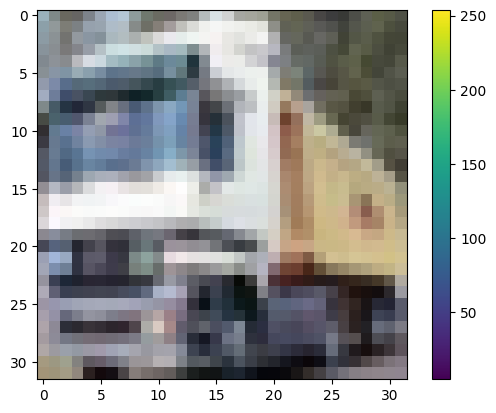

In [233]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)

In [234]:
x_train = x_train/ 255
x_test = x_test/ 255

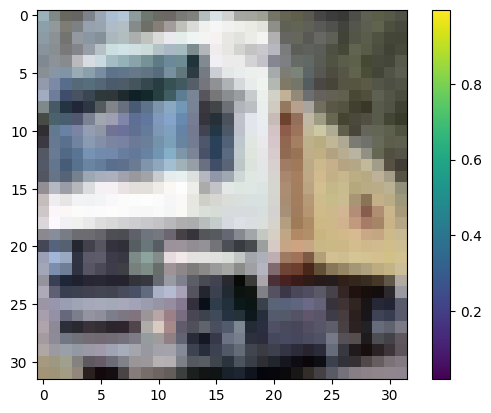

In [235]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)

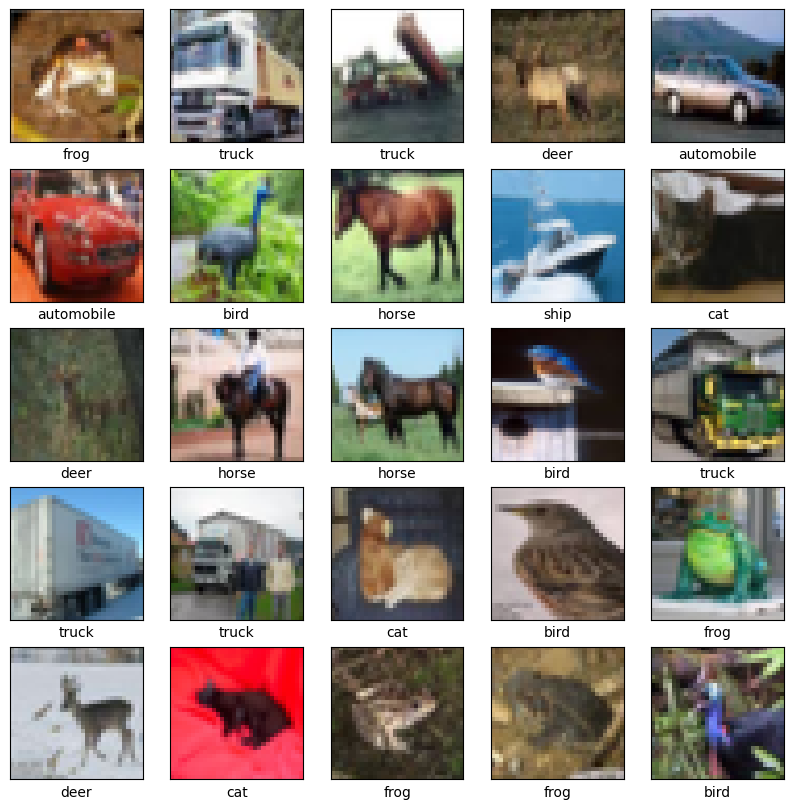

In [236]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[y_train[i][0]])

In [237]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [238]:
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.002), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [239]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                

In [240]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 88s 56ms/step - loss: 1.5309 - accuracy: 0.4436
Epoch 2/20
1563/1563 [==============================] - 86s 55ms/step - loss: 1.1191 - accuracy: 0.6040
Epoch 3/20
1563/1563 [==============================] - 86s 55ms/step - loss: 0.9232 - accuracy: 0.6772
Epoch 4/20
1563/1563 [==============================] - 88s 56ms/step - loss: 0.7973 - accuracy: 0.7216
Epoch 5/20
1563/1563 [==============================] - 87s 56ms/step - loss: 0.7068 - accuracy: 0.7562
Epoch 6/20
1563/1563 [==============================] - 86s 55ms/step - loss: 0.6284 - accuracy: 0.7805
Epoch 7/20
1563/1563 [==============================] - 86s 55ms/step - loss: 0.5599 - accuracy: 0.8054
Epoch 8/20
1563/1563 [==============================] - 86s 55ms/step - loss: 0.4987 - accuracy: 0.8266
Epoch 9/20
1563/1563 [==============================] - 87s 56ms/step - loss: 0.4411 - accuracy: 0.8443
Epoch 10/20
1563/1563 [==============================] - 87s 56m

In [241]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 5s 15ms/step - loss: 1.6445 - accuracy: 0.7487
Test loss: 1.6445101499557495
Test accuracy: 0.7487000226974487


In [242]:
predictions = model.predict(x_train)

1563/1563 [==============================] - 23s 15ms/step


In [243]:
predictions[2]

array([7.6793127e-02, 3.2619116e-07, 1.9023090e-06, 1.9304850e-04,
       2.2832453e-06, 6.1902691e-05, 2.7051247e-11, 9.4188422e-02,
       4.4053802e-11, 8.2875896e-01], dtype=float32)

In [244]:
np.argmax(predictions[2])

9

In [245]:
y_train[2]

array([9], dtype=uint8)

Text(0.5, 0, 'truck')

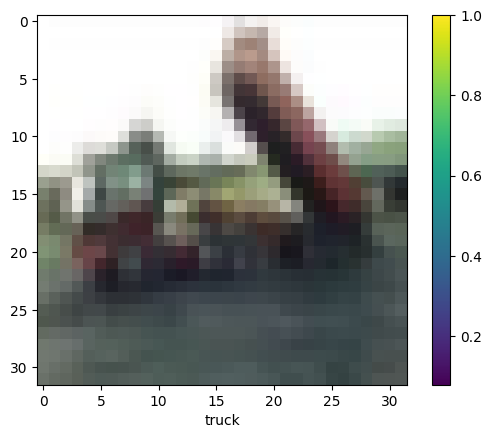

In [246]:
plt.figure()
plt.imshow(x_train[2])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[y_train[2][0]])